# Train-Test Split & Baseline Models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 7.1 Load Preprocessed Data ---
data = pd.read_csv("preprocessed_data.csv")

# --- 7.2 Define Features & Target ---
if "Customer Satisfaction Rating" in data.columns:
    # Convert target to categorical (>=3 means satisfied)
    data["Satisfaction_Label"] = (data["Customer Satisfaction Rating"] >= 3).astype(int)
    y = data["Satisfaction_Label"]

    # Drop target + raw datetime columns
    drop_cols = [
        "Customer Satisfaction Rating", 
        "Satisfaction_Label",
        "Date of Purchase", 
        "First Response Time", 
        "Time to Resolution"
    ]
    X = data.drop(columns=[col for col in drop_cols if col in data.columns])
else:
    raise ValueError("Target column 'Customer Satisfaction Rating' not found!")


# --- 7.3 Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

# --- 7.4 Baseline Model 1: Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# --- 7.5 Baseline Model 2: Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Training Samples: 6775
Testing Samples: 1694

🔹 Logistic Regression Results:
Accuracy: 0.8713105076741441
Confusion Matrix:
 [[   4  216]
 [   2 1472]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.02      0.04       220
           1       0.87      1.00      0.93      1474

    accuracy                           0.87      1694
   macro avg       0.77      0.51      0.48      1694
weighted avg       0.85      0.87      0.81      1694


🔹 Random Forest Results:
Accuracy: 0.871900826446281
Confusion Matrix:
 [[  38  182]
 [  35 1439]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.17      0.26       220
           1       0.89      0.98      0.93      1474

    accuracy                           0.87      1694
   macro avg       0.70      0.57      0.59      1694
weighted avg       0.84      0.87      0.84      1694



# Model Performance Visualization

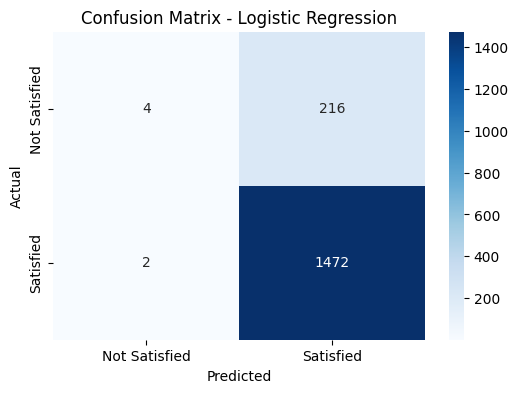

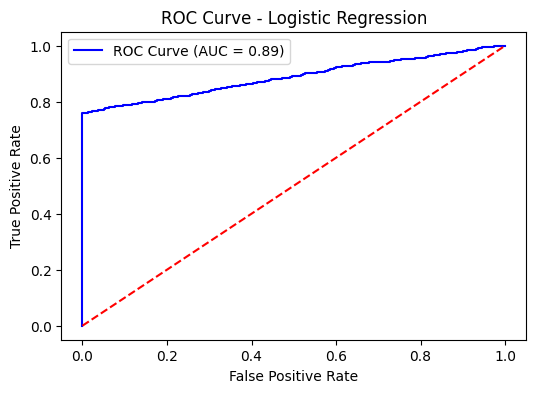

In [2]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# Train Logistic Regression again if not already in memory
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Confusion Matrix for Logistic Regression ---
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Satisfied","Satisfied"], 
            yticklabels=["Not Satisfied","Satisfied"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve for Logistic Regression ---
y_prob_lr = lr.predict_proba(X_test)[:,1]  # probability of satisfied
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color="red", linestyle="--")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()




# confusion matrix & ROC curve for both Logistic Regression (lr) and Random Forest (rf).

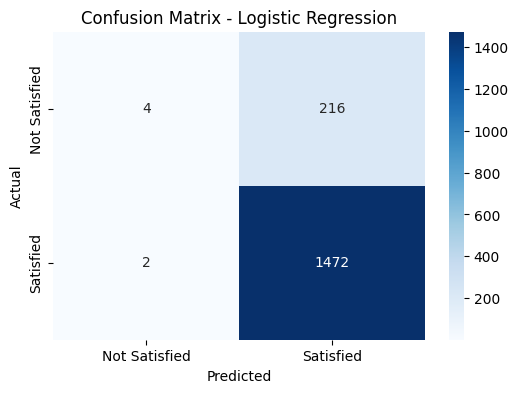

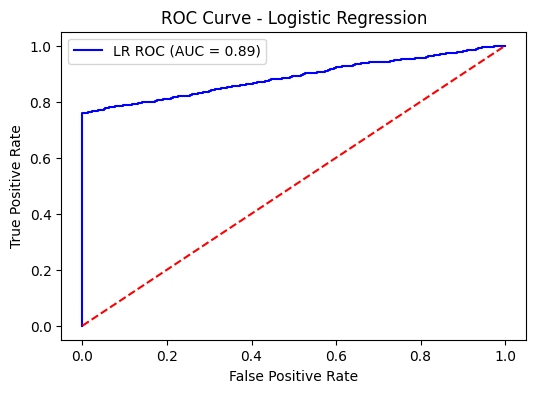

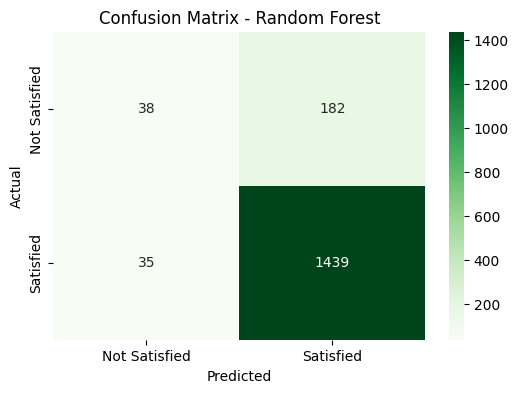

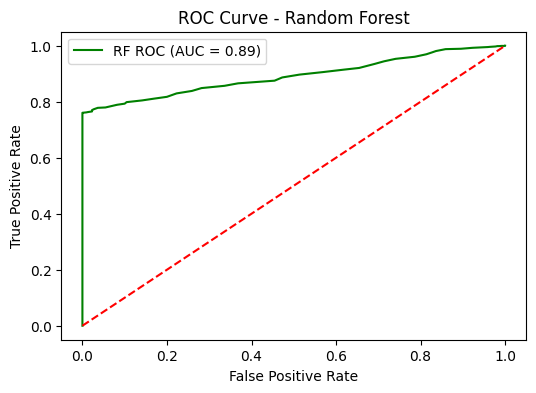

In [3]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# --- Logistic Regression ---
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Satisfied","Satisfied"], 
            yticklabels=["Not Satisfied","Satisfied"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_prob_lr = lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, color="blue", label=f"LR ROC (AUC = {roc_auc_lr:.2f})")
plt.plot([0,1],[0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


# --- Random Forest ---
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", 
            xticklabels=["Not Satisfied","Satisfied"], 
            yticklabels=["Not Satisfied","Satisfied"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, color="green", label=f"RF ROC (AUC = {roc_auc_rf:.2f})")
plt.plot([0,1],[0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


# LR vs RF performance

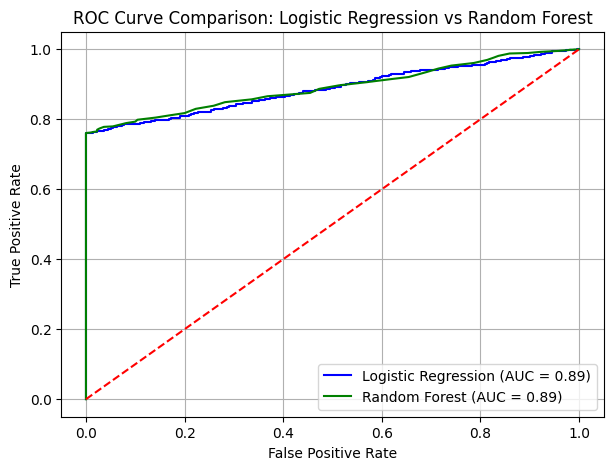

In [4]:
plt.figure(figsize=(7,5))

# Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color="blue", label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")

# Random Forest ROC
plt.plot(fpr_rf, tpr_rf, color="green", label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# Diagonal line
plt.plot([0,1],[0,1], color="red", linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Logistic Regression vs Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# comparison table

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dictionary to store metrics
metrics_dict = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC AUC": [roc_auc_lr, roc_auc_rf]
}

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_dict)
metrics_df


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.871311,0.872038,0.998643,0.931056,0.887206
1,Random Forest,0.871901,0.887724,0.976255,0.929887,0.891614


# Random Forest Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


# Evaluate Tuned Random Forest

In [7]:
y_pred_best_rf = best_rf.predict(X_test)
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_best_rf))
roc_auc_best_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])
print("ROC AUC:", roc_auc_best_rf)


              precision    recall  f1-score   support

           0       0.83      0.02      0.04       220
           1       0.87      1.00      0.93      1474

    accuracy                           0.87      1694
   macro avg       0.85      0.51      0.49      1694
weighted avg       0.87      0.87      0.82      1694

ROC AUC: 0.884282101887258


# Feature Importance

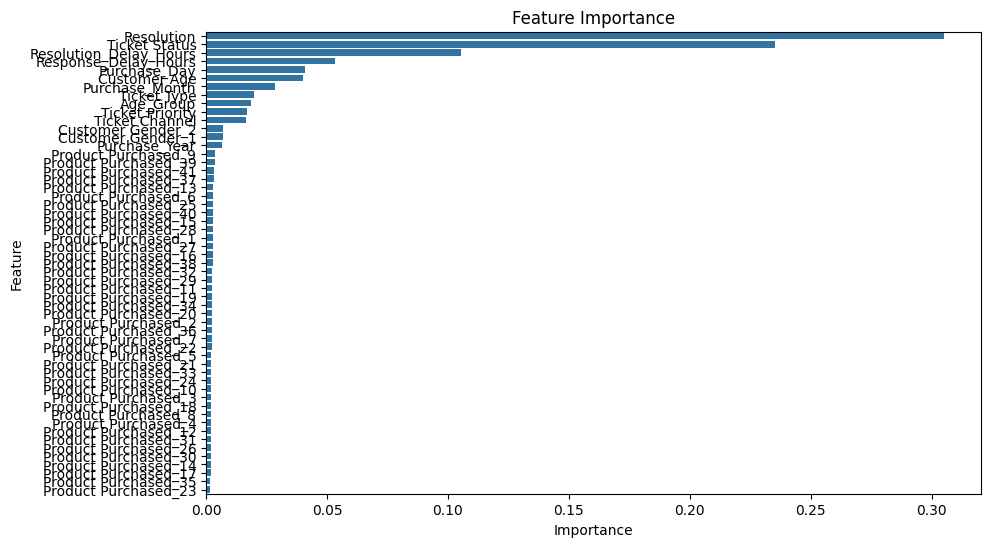

In [8]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance")
plt.show()


# Advanced Models & Comparison

# 1 XGBoost Classifier

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])
print("XGBoost ROC AUC:", roc_auc_xgb)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.31      0.36       220
           1       0.90      0.94      0.92      1474

    accuracy                           0.86      1694
   macro avg       0.66      0.62      0.64      1694
weighted avg       0.84      0.86      0.85      1694

XGBoost ROC AUC: 0.8871068212655729


c:\users\sugam\appdata\local\programs\python\python38\lib\site-packages\xgboost\core.py:158: UserWarning: [15:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# 2 LightGBM Classifier

In [10]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: c:\users\sugam\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip


In [11]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

roc_auc_lgb = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:,1])
print("LightGBM ROC AUC:", roc_auc_lgb)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5893, number of negative: 882
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 6775, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.869815 -> initscore=1.899328
[LightGBM] [Info] Start training from score 1.899328
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.27      0.33       220
           1       0.90      0.94      0.92      1474

    accuracy                           0.86      1694
   macro avg       0.66      0.61      0.63      1694
weighted avg       0.83      0.86      0.84      1694

LightGBM R

# 3 CatBoost Classifier

In [12]:

from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

roc_auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:,1])
print("CatBoost ROC AUC:", roc_auc_cat)


CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.19      0.25       220
           1       0.89      0.95      0.92      1474

    accuracy                           0.85      1694
   macro avg       0.63      0.57      0.59      1694
weighted avg       0.82      0.85      0.83      1694

CatBoost ROC AUC: 0.8784044652769212


# 4 Compare All Models

In [13]:
models = ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM", "CatBoost"]
roc_scores = [roc_auc_lr, roc_auc_best_rf, roc_auc_xgb, roc_auc_lgb, roc_auc_cat]

comparison_df = pd.DataFrame({'Model': models, 'ROC AUC': roc_scores})
comparison_df.sort_values(by='ROC AUC', ascending=False, inplace=True)
print(comparison_df)


                 Model   ROC AUC
0  Logistic Regression  0.887206
2              XGBoost  0.887107
1        Random Forest  0.884282
3             LightGBM  0.883382
4             CatBoost  0.878404


# ROC Curves + Final Model Selection

In [14]:
# Import Liabraries
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5893, number of negative: 882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 6775, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.869815 -> initscore=1.899328
[LightGBM] [Info] Start training from score 1.899328


LGBMClassifier(random_state=42)

In [17]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)


# Compute ROC curves for all models

In [18]:
# Logistic Regression
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# LightGBM
y_prob_lgb = lgb_model.predict_proba(X_test)[:,1]

# CatBoost
y_prob_cat = cat_model.predict_proba(X_test)[:,1]


# Plot ROC Curves

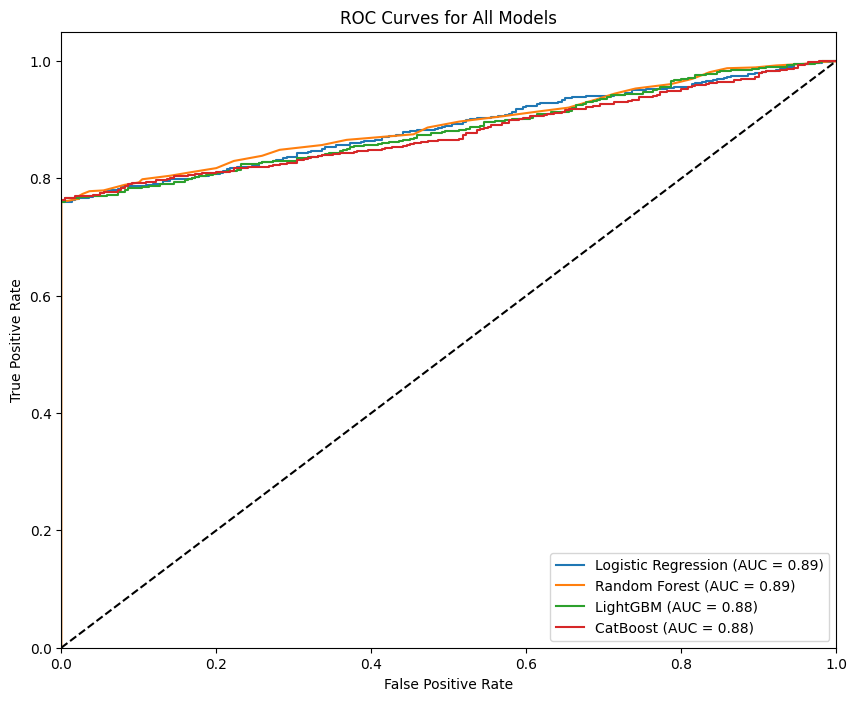

In [19]:
plt.figure(figsize=(10,8))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.2f})')

# CatBoost
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_cat:.2f})')

# Plot styling
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()


# Select and Save Final Model

In [20]:
# Suppose LightGBM has highest AUC
final_model = lgb_model


In [21]:
import joblib

# Save model to disk
joblib.dump(final_model, 'final_customer_satisfaction_model.pkl')

# Load later
# final_model = joblib.load('final_customer_satisfaction_model.pkl')


['final_customer_satisfaction_model.pkl']

# trains all four models and plots ROC curves

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5893, number of negative: 882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 6775, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.869815 -> initscore=1.899328
[LightGBM] [Info] Start training from score 1.899328


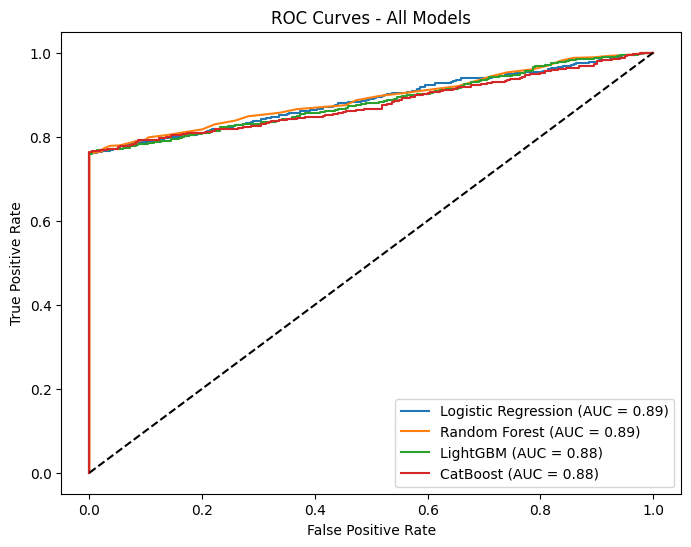

In [22]:
# --- 10. ROC Curves + Final Model Evaluation ---

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Optional: LightGBM & CatBoost if installed
try:
    from lightgbm import LGBMClassifier
    lgb_installed = True
except:
    print("LightGBM not installed")
    lgb_installed = False

try:
    from catboost import CatBoostClassifier
    cat_installed = True
except:
    print("CatBoost not installed")
    cat_installed = False

# --- 1. Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# --- 2. Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# --- 3. LightGBM ---
if lgb_installed:
    lgb_model = LGBMClassifier(random_state=42)
    lgb_model.fit(X_train, y_train)

# --- 4. CatBoost ---
if cat_installed:
    cat_model = CatBoostClassifier(random_state=42, verbose=0)
    cat_model.fit(X_train, y_train)

# --- Probabilities for ROC ---
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

if lgb_installed:
    y_prob_lgb = lgb_model.predict_proba(X_test)[:,1]
if cat_installed:
    y_prob_cat = cat_model.predict_proba(X_test)[:,1]

# --- Plot ROC Curves ---
plt.figure(figsize=(8,6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')

if lgb_installed:
    fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
    plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_score(y_test, y_prob_lgb):.2f})')

if cat_installed:
    fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
    plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_score(y_test, y_prob_cat):.2f})')

plt.plot([0,1],[0,1],'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.show()


# prints a full evaluation table

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- 1. Predictions ---
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
if lgb_installed:
    y_pred_lgb = lgb_model.predict(X_test)
if cat_installed:
    y_pred_cat = cat_model.predict(X_test)

# --- 2. Evaluation Function ---
def evaluate_model(y_true, y_pred, y_prob, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

# --- 3. Collect Results ---
results = []

results.append(evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest"))
if lgb_installed:
    results.append(evaluate_model(y_test, y_pred_lgb, y_prob_lgb, "LightGBM"))
if cat_installed:
    results.append(evaluate_model(y_test, y_pred_cat, y_prob_cat, "CatBoost"))

# --- 4. Convert to DataFrame and Display ---
import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
results_df.reset_index(drop=True, inplace=True)

print("✅ Model Evaluation Table:")
display(results_df)


✅ Model Evaluation Table:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.871901,0.887724,0.976255,0.929887,0.891614
1,Logistic Regression,0.871311,0.872038,0.998643,0.931056,0.887206
2,LightGBM,0.856553,0.896841,0.943691,0.919669,0.883382
3,CatBoost,0.854782,0.887626,0.953867,0.919555,0.878404


# best model (based on ROC-AUC)

In [24]:
import joblib  # for saving and loading models

# --- 1. Select the best model based on ROC-AUC ---
best_model_name = results_df.loc[0, "Model"]
print(f"🏆 Best Model Selected: {best_model_name}")

if best_model_name == "Logistic Regression":
    best_model = log_reg
elif best_model_name == "Random Forest":
    best_model = rf_model
elif best_model_name == "LightGBM":
    best_model = lgb_model
elif best_model_name == "CatBoost":
    best_model = cat_model

# --- 2. Save the model ---
joblib.dump(best_model, "best_customer_satisfaction_model.pkl")
print("💾 Model saved as 'best_customer_satisfaction_model.pkl'")

# --- 3. Load the model later for predictions ---
# loaded_model = joblib.load("best_customer_satisfaction_model.pkl")
# predictions = loaded_model.predict(new_data)
# print(predictions)


🏆 Best Model Selected: Random Forest
💾 Model saved as 'best_customer_satisfaction_model.pkl'


# Model Deployment & Predictions

In [25]:
import joblib

# Load the previously saved model
model = joblib.load("best_customer_satisfaction_model.pkl")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


# Prepare New input data 

In [26]:
import pandas as pd
new_data = pd.read_csv("cleaned_data.csv")
data.head(5).to_csv("new_customer_tickets.csv", index=False)


# Load new ticket/customer data
new_data = pd.read_csv("new_customer_tickets.csv")

# Make sure date columns are parsed as datetime
new_data['Date of Purchase'] = pd.to_datetime(new_data['Date of Purchase'])
new_data['First Response Time'] = pd.to_datetime(new_data['First Response Time'])
new_data['Time to Resolution'] = pd.to_datetime(new_data['Time to Resolution'])

# Now you can do feature engineering
new_data['Response_Delay'] = (new_data['First Response Time'] - new_data['Date of Purchase']).dt.total_seconds()/3600
new_data['Resolution_Delay'] = (new_data['Time to Resolution'] - new_data['First Response Time']).dt.total_seconds()/3600

# Age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ["0-20","21-30","31-40","41-50","51-60","60+"]
new_data['Customer_Age_Group'] = pd.cut(new_data['Customer Age'], bins=bins, labels=labels)

# Drop text columns if not used
new_data = new_data.drop(columns=['Ticket Subject', 'Ticket Description'], errors='ignore')


# Make Prediction

In [27]:
import pandas as pd
import numpy as np
import joblib

# --- 1. Load trained model ---
model = joblib.load("best_customer_satisfaction_model.pkl")

# --- 2. Load new data ---
new_data = pd.read_csv("new_customer_tickets.csv")

# --- 3. Feature Engineering ---
new_data['Date of Purchase'] = pd.to_datetime(new_data['Date of Purchase'])
new_data['First Response Time'] = pd.to_datetime(new_data['First Response Time'])
new_data['Time to Resolution'] = pd.to_datetime(new_data['Time to Resolution'])

new_data['Response_Delay'] = (new_data['First Response Time'] - new_data['Date of Purchase']).dt.total_seconds()/3600
new_data['Resolution_Delay'] = (new_data['Time to Resolution'] - new_data['First Response Time']).dt.total_seconds()/3600

# Customer Age Group (optional if used in training)
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
if 'Customer Age' in new_data.columns:
    new_data['Customer_Age_Group'] = pd.cut(new_data['Customer Age'], bins=bins, labels=labels)

# --- 4. Prepare features dynamically ---
trained_features = model.feature_names_in_  # features used during training

# Keep only columns that exist in new_data
X_new = new_data.reindex(columns=trained_features, fill_value=0)

# --- 5. Make predictions ---
predictions = model.predict(X_new)
pred_probs = model.predict_proba(X_new)[:,1]

# --- 6. Add predictions to dataframe ---
new_data['Predicted_Satisfaction'] = predictions
new_data['Satisfaction_Probability'] = pred_probs

# --- 7. Save predictions ---
new_data.to_csv("predicted_customer_satisfaction.csv", index=False)
print("✅ Predictions saved successfully!")


✅ Predictions saved successfully!
